Tutorial - Part #3 - Advanced SingleImage
=======================

In this tutorial a more advanced set of examples are presented on SingleImage class,
which allows tod do more specific tasks with the instances.

We import the packages, and also a pair of sample images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.visualization import LinearStretch, LogStretch, ZScaleInterval, MinMaxInterval, ImageNormalize

In [3]:
import properimage.single_image as si

In [4]:
img_path = './../../../data/aligned_eso085-030-004.fit'

In [5]:
img = si.SingleImage(img_path)

Sources found = 84
stamps will be 15 x 15


Quickly we get the answer for the number of sources *a priori* we would use and the *estimated* size of thw PSF cutout stamp.

If we want to know the different properties assigned to this instance we can enumerate them:

* The origin of the information:

In [6]:
print(img.attached_to)

./../../../data/aligned_eso085-030-004.fit


* The header if a fits file

In [7]:
img.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  682                                                  
DATE-OBS= '2015-12-27T06:26:24' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.091654000000002 /CCD temperature at start of exposure in C       
XPIXSZ  =   27.000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   27.000000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

* The pixel data

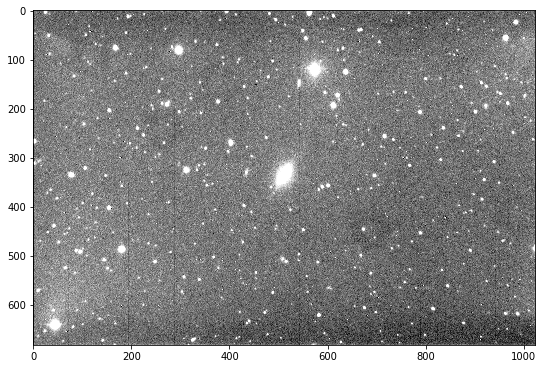

In [8]:
norm = ImageNormalize(img.pixeldata, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(9,10))
plt.imshow(img.pixeldata, cmap='Greys_r', norm=norm)


* The mask inferred or setted

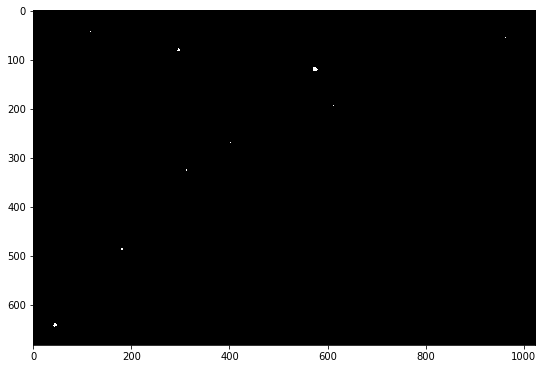

In [9]:
plt.figure(figsize=(9,10))
plt.imshow(img.mask, cmap='Greys_r')

* The background calculated

Background level = 8140.66210938, rms = 73.2535018921


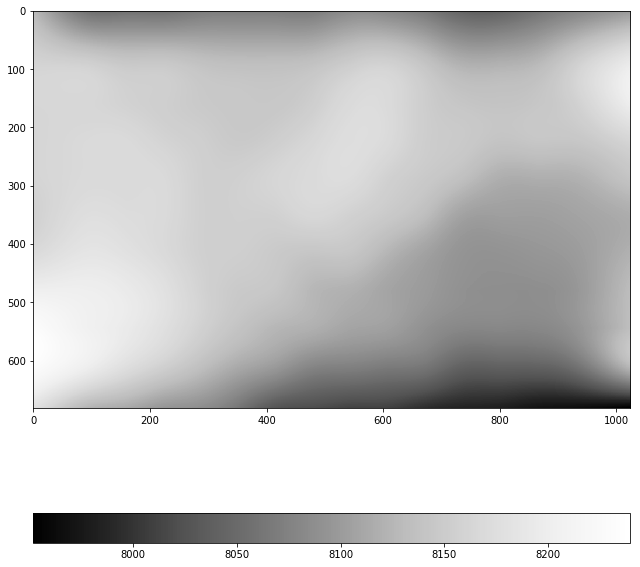

In [10]:
plt.figure(figsize=(9,10))
plt.imshow(img.background, cmap='Greys_r')
plt.colorbar(orientation='horizontal')
plt.tight_layout()

As the background is being estimated only if accesed, then it prints the results. 

* The background subtracted image

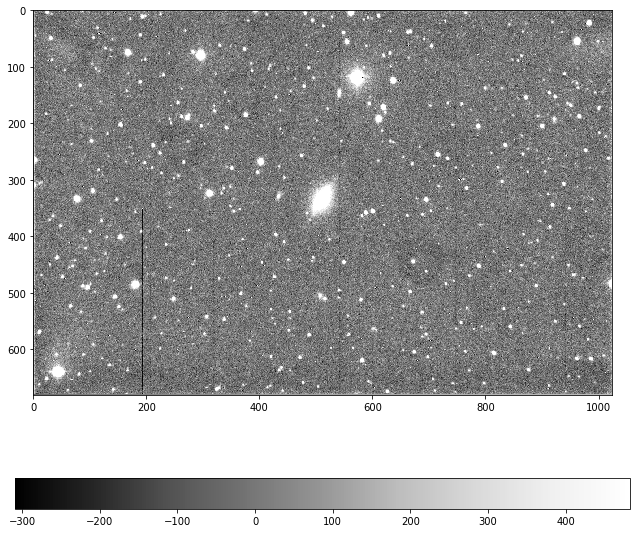

In [11]:
norm = ImageNormalize(img.bkg_sub_img, interval=ZScaleInterval(),
                      stretch=LinearStretch())
plt.figure(figsize=(9,8))
plt.imshow(img.bkg_sub_img, cmap='Greys_r', norm=norm)
plt.colorbar(orientation='horizontal')
plt.tight_layout()

* It also can be obtained a interpolated version of this image. The interpolated version is replacing masked pixels by using a box kernel convolutional interpolation:

('Masked pixels: ', 175)


/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:673: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigarray[arrayslices] = array
/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:679: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bigkernel[kernslices] = normalized_kernel
/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/astropy/convolution/convolve.py:695: FutureWarning: Using a non-tuple sequence for multidimensional indexing is de

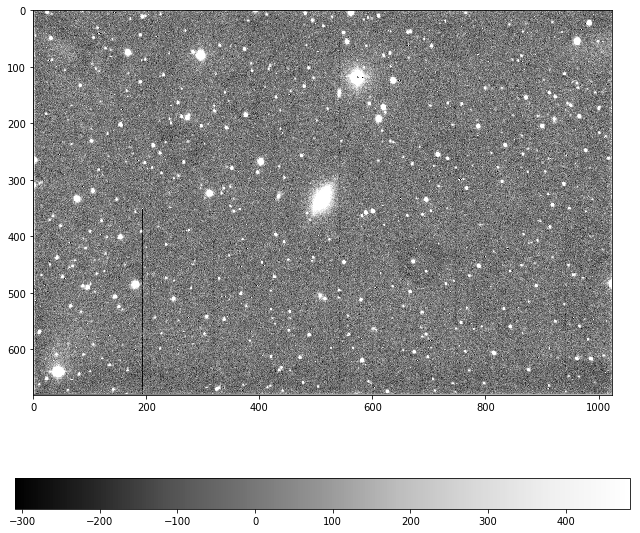

In [12]:
norm = ImageNormalize(img.bkg_sub_img, interval=ZScaleInterval(),
                      stretch=LinearStretch())
plt.figure(figsize=(9,8))
plt.imshow(img.interped, cmap='Greys_r', norm=norm)
plt.colorbar(orientation='horizontal')
plt.tight_layout()

* The stamp_shape to use (this is the final figure, after some exploring of the stars chosen)

In [13]:
print(img.stamp_shape)

(15, 15)


* Get the stamp positions is also possible

In [14]:
print(img.stamps_pos[0:10])

updating stamp shape to (21,21)
[[  4.00943722  25.2612925 ]
 [  7.14687054 480.90913039]
 [ 11.7277283  610.83903619]
 [ 12.829334   193.25984617]
 [ 19.5352482  493.7067045 ]
 [ 41.55364391 548.48252228]
 [ 50.58756507  31.5412276 ]
 [ 64.9548984  704.69765375]
 [ 70.30182446 373.69091309]
 [ 74.96856988 282.51691291]]


* Obtaining the best sources was explained in Tutorial 01, but here we show it again just to be complete

In [15]:
print(img.best_sources[0:10][['x', 'y', 'cflux']])

[( 25.2612925 ,  4.00943722, 53945.6953125 )
 (480.90913039,  7.14687054, 24435.09375   )
 (610.83903619, 11.7277283 , 40934.80078125)
 (193.25984617, 12.829334  , 47998.46875   )
 (493.7067045 , 19.5352482 , 30155.77929688)
 (548.48252228, 41.55364391, 48257.42578125)
 ( 31.5412276 , 50.58756507, 22010.40234375)
 (704.69765375, 64.9548984 , 18889.47265625)
 (373.69091309, 70.30182446, 19581.18359375)
 (282.51691291, 74.96856988, 24461.1875    )]


* We can get the final number of sources used in PSF estimation

In [16]:
print(img.n_sources)

84


* We can also print the covariance matrix from these objects

In [17]:
print(img.cov_matrix)

[[8.98674240e-05 6.08954674e-05 7.32941184e-05 ... 5.38280386e-05
  5.81122512e-05 8.01241865e-05]
 [6.08954674e-05 5.48541375e-05 5.77502219e-05 ... 4.10920494e-05
  4.41055093e-05 5.80201737e-05]
 [7.32941184e-05 5.77502219e-05 7.42334359e-05 ... 4.84301163e-05
  5.77332326e-05 7.41390423e-05]
 ...
 [5.38280386e-05 4.10920494e-05 4.84301163e-05 ... 4.25186943e-05
  3.73890063e-05 5.00707775e-05]
 [5.81122512e-05 4.41055093e-05 5.77332326e-05 ... 3.73890063e-05
  5.33519072e-05 6.23976937e-05]
 [8.01241865e-05 5.80201737e-05 7.41390423e-05 ... 5.00707775e-05
  6.23976937e-05 9.33254806e-05]]


* As showed from Tutorial 02 we can get the PSF, depending on our level of approximation needed

In [18]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.01)

((84, 84), (441, 84))


In [19]:
print(len(psf_basis), len(a_fields))

(45, 45)


Check the information loss argument, which states the maximum amount of information lost in the basis expansion.
If we change it the basis is updated:

In [20]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.10)
print(len(psf_basis), len(a_fields))

((84, 84), (441, 84))
(3, 3)


Of course the elements of the basis are unchanged, only a subset is returned. So going from small `inf_loss` to bigger values is the same as choosing less elements in the calculated basis.

Once obtained this basis and coefficient fields we can display them using some of the `plot` module functionalities:

In [21]:
from properimage.plot import plot_afields, plot_psfbasis

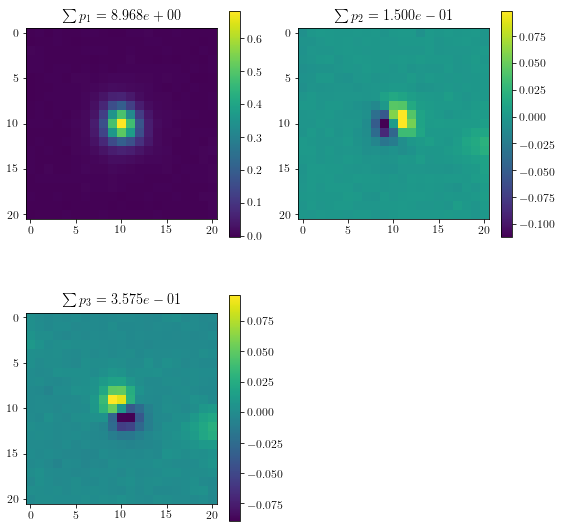

In [22]:
plot_psfbasis(psf_basis=psf_basis, nbook=True)

For the `a_fields` object we need to give the coordinates where we evaluate this coefficients.
A function is provided, inside `img` instance object.

In [23]:
x, y = img.get_afield_domain()

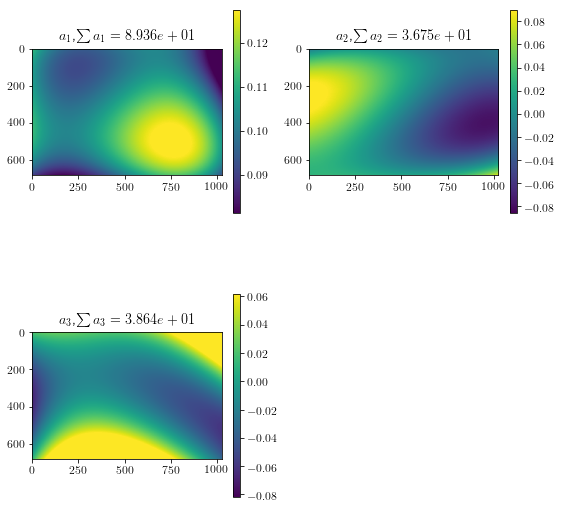

In [24]:
plot_afields(a_fields=a_fields, x=x, y=y, nbook=True)

* The instance is capable of calculating its own $S$ component (Zackay et al. 2016 notation)

In [25]:
S = img.s_component

/home/bruno/.virtualenvs/iPTF/local/lib/python2.7/site-packages/pyfftw/builders/_utils.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a_copy[update_input_array_slicer])


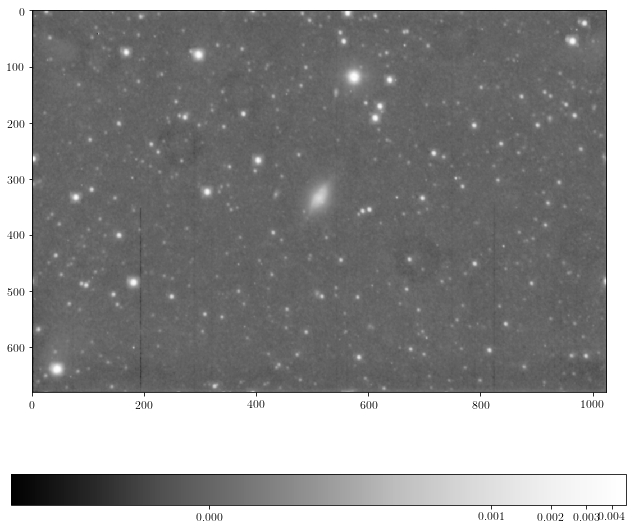

In [26]:
norm = ImageNormalize(S, interval=MinMaxInterval(),
                      stretch=LogStretch())
plt.figure(figsize=(9,8))
plt.imshow(S, cmap='Greys_r', norm=norm)
plt.colorbar(orientation='horizontal')
plt.tight_layout()